In [1]:
!pip install mysql.connector


In [3]:
import pandas as pd 
import mysql.connector

In [8]:
!pip install mysql-connector-python


In [17]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='root',
    database='ipl'
)

NotSupportedError: Authentication plugin 'caching_sha2_password' is not supported

In [15]:
!pip install --upgrade mysql-connector-python

In [16]:
!pip install pymysql

In [18]:
import pymysql

# Replace with your MySQL credentials
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='root',
    db='ipl',
    charset='utf8mb4',
    cursorclass=pymysql.cursors.DictCursor
)

In [19]:
connection

In [21]:
pd.read_sql_query("""
SELECT * FROM 
(SELECT
CONCAT("Match-",ROW_NUMBER() OVER(ORDER BY match_id)) AS "match_no",
SUM(batsman_runs) AS 'runs_scored',
SUM(SUM(batsman_runs)) OVER w AS 'carrer_runs',
AVG(SUM(batsman_runs)) OVER w AS 'avg_runs',
AVG(SUM(batsman_runs)) OVER (ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS 'running_avg'
FROM ipl.ipl_deliveries
WHERE batsman='V Kohli'
GROUP BY match_id
WINDOW w AS (ROWS BETWEEN unbounded PRECEDING AND current row)) t ;
""",con=connection)

,match_no,runs_scored,carrer_runs,avg_runs,running_avg
0,Match-1,124.0,124.0,124.0000,124.0000
1,Match-2,56.0,180.0,90.0000,90.0000
2,Match-3,128.0,308.0,102.6667,102.6667
3,Match-4,0.0,308.0,77.0000,77.0000
4,Match-5,20.0,328.0,65.6000,65.6000
...,...,...,...,...,...
136,Match-137,150.0,8404.0,61.3431,119.6000
137,Match-138,226.0,8630.0,62.5362,135.6000
138,Match-139,108.0,8738.0,62.8633,130.4000
139,Match-140,0.0,8738.0,62.4143,110.4000


In [22]:
df=pd.read_sql_query("""
SELECT * FROM 
(SELECT
CONCAT("Match-",ROW_NUMBER() OVER(ORDER BY match_id)) AS "match_no",
SUM(batsman_runs) AS 'runs_scored',
SUM(SUM(batsman_runs)) OVER w AS 'carrer_runs',
AVG(SUM(batsman_runs)) OVER w AS 'avg_runs',
AVG(SUM(batsman_runs)) OVER (ROWS BETWEEN 9 PRECEDING AND CURRENT ROW) AS 'running_avg'
FROM ipl.ipl_deliveries
WHERE batsman='V Kohli'
GROUP BY match_id
WINDOW w AS (ROWS BETWEEN unbounded PRECEDING AND current row)) t ;
""",con=connection)

In [23]:
df.head()

,match_no,runs_scored,carrer_runs,avg_runs,running_avg
0,Match-1,124.0,124.0,124.0000,124.0000
1,Match-2,56.0,180.0,90.0000,90.0000
2,Match-3,128.0,308.0,102.6667,102.6667
3,Match-4,0.0,308.0,77.0000,77.0000
4,Match-5,20.0,328.0,65.6000,65.6000


In [24]:
import matplotlib.pyplot as plt 


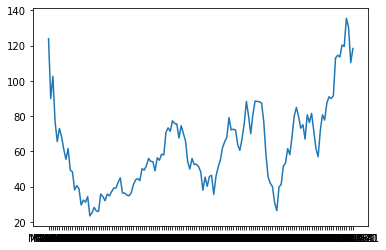

In [26]:
plt.plot(df['match_no'],df['running_avg'])

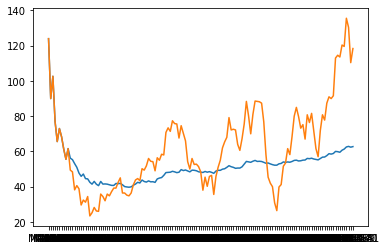

In [27]:
plt.plot(df['match_no'],df['avg_runs'])
plt.plot(df['match_no'],df['running_avg'])

In [28]:
df.to_csv('ipl111111.csv')